# Preprocessing and Explanatory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import calendar
import datetime

## Preprocessing

In [2]:
dataset_name = 'NYPD_Complaint_Data_Historic.csv'

In [3]:
# Reading whole dataset
crime_df_ = pd.read_csv(dataset_name)

In [ ]:
# Store a copy of the original dataset
crime_df = crime_df_.copy()

### Checking Percentage of Nan Values in each column

In [5]:
#See the percentege of missing values in each variable
(crime_df.isna().sum()/crime_df.shape[0]*100).sort_values(ascending=False)

PARKS_NM             99.624959
STATION_NAME         97.783363
TRANSIT_DISTRICT     97.783363
HADEVELOPT           95.298097
HOUSING_PSA          92.316831
SUSP_AGE_GROUP       65.011382
SUSP_SEX             48.264796
SUSP_RACE            46.457392
CMPLNT_TO_DT         23.104740
CMPLNT_TO_TM         23.041521
VIC_AGE_GROUP        22.213213
LOC_OF_OCCUR_DESC    20.930063
PREM_TYP_DESC         0.552400
OFNS_DESC             0.255193
X_COORD_CD            0.235073
Y_COORD_CD            0.235073
Latitude              0.235073
Longitude             0.235073
Lat_Lon               0.235073
BORO_NM               0.153593
PATROL_BORO           0.091310
PD_DESC               0.085114
PD_CD                 0.085114
JURISDICTION_CODE     0.085114
ADDR_PCT_CD           0.029366
CMPLNT_FR_DT          0.008880
VIC_RACE              0.004189
VIC_SEX               0.004176
CMPLNT_FR_TM          0.000651
CRM_ATPT_CPTD_CD      0.000095
RPT_DT                0.000000
KY_CD                 0.000000
LAW_CAT_

### Data Reduction

In [ ]:
# Dropping unneeded columns
crime_df = crime_df.drop(['CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT','HOUSING_PSA',
                          'HADEVELOPT','KY_CD','PD_CD','X_COORD_CD','Y_COORD_CD','Lat_Lon','TRANSIT_DISTRICT',
                          'STATION_NAME','PARKS_NM','JURISDICTION_CODE'], axis=1)

crime_df['CMPLNT_FR_TM'] = crime_df['CMPLNT_FR_TM'].str[:2]

crime_df

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,12/31/2019,17,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,40.820927,-73.943324,PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,E
1,12/29/2019,16,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,40.885701,-73.861640,PATROL BORO BRONX,UNKNOWN,UNKNOWN,E
2,12/15/2019,18,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,25-44,UNKNOWN,M,40.742281,-73.819824,PATROL BORO QUEENS NORTH,25-44,WHITE HISPANIC,F
3,12/28/2019,01,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,18-24,BLACK,M,40.875311,-73.847545,PATROL BORO BRONX,UNKNOWN,UNKNOWN,E
4,09/05/2008,21,MURDER & NON-NEGL. MANSLAUGHTER,NaN,COMPLETED,FELONY,NaN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,NaN,NaN,40.698827,-73.938819,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375988,12/17/2018,03,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,COMPLETED,MISDEMEANOR,BRONX,FRONT OF,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NaN,NaN,NaN,40.887333,-73.847250,PATROL BORO BRONX,25-44,WHITE HISPANIC,F
7375989,06/05/2018,23,GRAND LARCENY OF MOTOR VEHICLE,"LARCENY, GRAND OF MOPED",COMPLETED,FELONY,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,M,40.827414,-73.877946,PATROL BORO BRONX,25-44,BLACK,M
7375990,02/10/2018,08,PETIT LARCENY,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,INSIDE,GROCERY/BODEGA,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,40.834528,-73.903836,PATROL BORO BRONX,45-64,BLACK,F
7375991,12/11/2018,07,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,<18,BLACK,U,40.811812,-73.938329,PATROL BORO MAN NORTH,<18,BLACK,M


### Data Cleaning

In [ ]:
# Removing rows where NaN is minimal for important columns (No effect on Dataset)
subset = ['Latitude','Longitude','CMPLNT_FR_DT','CMPLNT_FR_TM','BORO_NM','OFNS_DESC','PREM_TYP_DESC','PATROL_BORO','VIC_RACE','VIC_SEX']
for x in subset:
    crime_df = crime_df[crime_df[x].notna()]

# Suspect & Victim Age Group - these columns contains noise (Converting it to UNKNOWN)
crime_df.loc[~crime_df['VIC_AGE_GROUP'].str.contains('25-44|UNKNOWN|45-64|18-24|65+|<18',na=False), 'VIC_AGE_GROUP'] = 'UNKNOWN'
crime_df.loc[~crime_df['SUSP_AGE_GROUP'].str.contains('25-44|UNKNOWN|45-64|18-24|65+|<18',na=False), 'SUSP_AGE_GROUP'] = 'UNKNOWN'

# Generalising Location of Offence
crime_df.loc[crime_df.LOC_OF_OCCUR_DESC != "INSIDE", "LOC_OF_OCCUR_DESC"] = "OUTSIDE"

crime_df['CMPLNT_FR_TM'].dropna()
crime_df = crime_df.fillna('UNKNOWN') # Filling NaN with "UNKNOWN"

# Replacing some column values
crime_df = crime_df.replace({'HARRASSMENT 2': 'HARASSMENT', 'ESCAPE 3': 'ESCAPE',
'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF': 'OTHER OFFENSES RELATED TO THEFT',                         
'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
'E': 'UNKNOWN','D': 'BUSINESS/ORGANIZATION','F': 'FEMALE','M': 'MALE'})

# Appending string for Victim & Suspect Personal Details (ex: age)

# Suspect
crime_df['SUSP_AGE_GROUP'] = crime_df['SUSP_AGE_GROUP'].astype(str) + ' (Suspect)'
crime_df['SUSP_RACE'] = crime_df['SUSP_RACE'].astype(str) + ' (Suspect)'
crime_df['SUSP_SEX'] = crime_df['SUSP_SEX'].astype(str) + ' (Suspect)'

# Victim
crime_df['VIC_AGE_GROUP'] = crime_df['VIC_AGE_GROUP'].astype(str) + ' (Victim)'
crime_df['VIC_RACE'] = crime_df['VIC_RACE'].astype(str) + ' (Victim)'
crime_df['VIC_SEX'] = crime_df['VIC_SEX'].astype(str) + ' (Victim)'

In [ ]:
# Generalising column values

# Offense Description
crime_df.loc[crime_df['OFNS_DESC'].str.contains('KIDNAPPING'), 'OFNS_DESC'] = 'KIDNAPPING'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('BURGLAR'), 'OFNS_DESC'] = 'BURGLAR'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('PETIT LARCENY'), 'OFNS_DESC'] = 'PETIT LARCENY'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('INTOXICATED'), 'OFNS_DESC'] = 'INTOXICATED'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('HOMICIDE'), 'OFNS_DESC'] = 'HOMICIDE'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('OFFENSES AGAINST'), 'OFNS_DESC'] = 'OFFENSES AGAINST'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('NYS LAWS'), 'OFNS_DESC'] = 'NYS LAWS'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('OTHER STATE LAWS'), 'OFNS_DESC'] = 'OTHER STATE LAWS'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('GRAND LARCENY'), 'OFNS_DESC'] = 'GRAND LARCENY'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('CRIMINAL'), 'OFNS_DESC'] = 'CRIMINAL ACTION BY PERSON'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('SEX CRIMES|RAPE'), 'OFNS_DESC'] = 'SEX CRIMES'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('LOITERING'), 'OFNS_DESC'] = 'LOITERING'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('DANGEROUS WEAPONS|UNLAWFUL POSS. WEAP. ON SCHOOL'), 'OFNS_DESC'] = 'DANGEROUS WEAPONS'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('ASSAULT'), 'OFNS_DESC'] = 'ASSAULT'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('VEHICLE AND TRAFFIC LAWS|OTHER TRAFFIC INFRACTION'), 'OFNS_DESC'] = 'VEHICLE AND TRAFFIC LAWS'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('LARCENY|THEFT OF SERVICES|OTHER OFFENSES RELATED TO THEFT|FRAUD'), 'OFNS_DESC'] = 'THEFT/LARCENCY OF PROPERTY/SERVICES/CASH'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('ADMINISTRATIVE CODE'), 'OFNS_DESC'] = 'ADMINISTRATIVE CODE'
crime_df.loc[crime_df['OFNS_DESC'].str.contains('CHILD ABANDONMENT/NON SUPPORT|OFFENSES RELATED TO CHILDREN'), 'OFNS_DESC'] = 'OFFENSES RELATED TO CHILDREN'



# Location where offense occured
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('STORE|FOOD SUPERMARKET|GROCERY/BODEGA|FAST FOOD|SHOE|CLOTHING/BOUTIQUE|SMALL MERCHANT|BEAUTY & NAIL SALON|JEWELRY|DRY CLEANER/LAUNDRY|FACTORY/WAREHOUSE|PHOTO/COPY'), 'PREM_TYP_DESC'] = 'STORE/SHOP'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('RESIDENCE'), 'PREM_TYP_DESC'] = 'RESIDENCE'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('BUILDING'), 'PREM_TYP_DESC'] = 'BUILDING'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('PARKING'), 'PREM_TYP_DESC'] = 'PARKING LOT'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('TERMINAL'), 'PREM_TYP_DESC'] = 'TERMINAL'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('MAILBOX'), 'PREM_TYP_DESC'] = 'MAILBOX'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('TRANSIT|BUS|TAXI'), 'PREM_TYP_DESC'] = 'TRANSIT'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('FACILITY'), 'PREM_TYP_DESC'] = 'FACILITY'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('SCHOOL'), 'PREM_TYP_DESC'] = 'SCHOOL'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('CHURCH|SYNAGOGUE|MOSQUE|OTHER HOUSE OF WORSHIP'), 'PREM_TYP_DESC'] = 'HOUSE OF WORSHIPS'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('OPEN AREAS (OPEN LOTS)|PARK/PLAYGROUND'), 'PREM_TYP_DESC'] = 'OPEAN AREAS'
crime_df.loc[crime_df['PREM_TYP_DESC'].str.contains('BANK|ATM|CHECK CASHING BUSINESS'), 'PREM_TYP_DESC'] = 'BANK/CASHING BUSINESS'


crime_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,12/31/2019,17,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,OUTSIDE,STREET,N.Y. POLICE DEPT,UNKNOWN (Suspect),UNKNOWN (Suspect),UNKNOWN (Suspect),40.820927,-73.943324,PATROL BORO MAN NORTH,UNKNOWN (Victim),UNKNOWN (Victim),UNKNOWN (Victim)
1,12/29/2019,16,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,OUTSIDE,STREET,N.Y. POLICE DEPT,UNKNOWN (Suspect),UNKNOWN (Suspect),UNKNOWN (Suspect),40.885701,-73.861640,PATROL BORO BRONX,UNKNOWN (Victim),UNKNOWN (Victim),UNKNOWN (Victim)
2,12/15/2019,18,HARASSMENT,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,OUTSIDE,STREET,N.Y. POLICE DEPT,25-44 (Suspect),UNKNOWN (Suspect),MALE (Suspect),40.742281,-73.819824,PATROL BORO QUEENS NORTH,25-44 (Victim),WHITE HISPANIC (Victim),FEMALE (Victim)
3,12/28/2019,01,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,OUTSIDE,STREET,N.Y. POLICE DEPT,18-24 (Suspect),BLACK (Suspect),MALE (Suspect),40.875311,-73.847545,PATROL BORO BRONX,UNKNOWN (Victim),UNKNOWN (Victim),UNKNOWN (Victim)
5,12/27/2019,22,BURGLAR,"BURGLARY,RESIDENCE,NIGHT",ATTEMPTED,FELONY,MANHATTAN,OUTSIDE,RESIDENCE,N.Y. POLICE DEPT,UNKNOWN (Suspect),UNKNOWN (Suspect),UNKNOWN (Suspect),40.720759,-73.980466,PATROL BORO MAN SOUTH,UNKNOWN (Victim),UNKNOWN (Victim),MALE (Victim)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375988,12/17/2018,03,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,COMPLETED,MISDEMEANOR,BRONX,OUTSIDE,RESIDENCE,N.Y. HOUSING POLICE,UNKNOWN (Suspect),UNKNOWN (Suspect),UNKNOWN (Suspect),40.887333,-73.847250,PATROL BORO BRONX,25-44 (Victim),WHITE HISPANIC (Victim),FEMALE (Victim)
7375989,06/05/2018,23,THEFT/LARCENCY OF PROPERTY/SERVICES/CASH,"LARCENY, GRAND OF MOPED",COMPLETED,FELONY,BRONX,OUTSIDE,STREET,N.Y. POLICE DEPT,UNKNOWN (Suspect),UNKNOWN (Suspect),MALE (Suspect),40.827414,-73.877946,PATROL BORO BRONX,25-44 (Victim),BLACK (Victim),MALE (Victim)
7375990,02/10/2018,08,THEFT/LARCENCY OF PROPERTY/SERVICES/CASH,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,INSIDE,STORE/SHOP,N.Y. POLICE DEPT,UNKNOWN (Suspect),UNKNOWN (Suspect),U (Suspect),40.834528,-73.903836,PATROL BORO BRONX,45-64 (Victim),BLACK (Victim),FEMALE (Victim)
7375991,12/11/2018,07,ASSAULT,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,OUTSIDE,STREET,N.Y. POLICE DEPT,<18 (Suspect),BLACK (Suspect),U (Suspect),40.811812,-73.938329,PATROL BORO MAN NORTH,<18 (Victim),BLACK (Victim),MALE (Victim)


### Data Integration

In [ ]:
def convertDateToDay(column):
    days = []
    for value in column:
        if value is not None:
            year = int(value.split('/')[2])
            month = int(value.split('/')[0])
            day = int(value.split('/')[1])
        days.append(datetime.datetime(year,month,day).weekday())  #0-6 (0:Monday ; 6:Sunday)
    return days

In [ ]:
crime_df['Day Number'] = convertDateToDay(crime_df['CMPLNT_FR_DT'])
crime_df['Month Number'] = crime_df['CMPLNT_FR_DT'].str.split('/').str[0].astype('int64')
crime_df['Day No'] = crime_df['CMPLNT_FR_DT'].str.split('/').str[1].astype('int64')
crime_df['Year'] = crime_df['CMPLNT_FR_DT'].str.split('/').str[2].astype('int64')

# Converting Month number to Month name
crime_df['Month Name'] = crime_df['Month Number'].apply(lambda x: calendar.month_abbr[x])

# Converting Day Number to Day Name 
crime_df['Day Name'] = crime_df['Day Number']
crime_df['Day Name'] = crime_df['Day Name'].apply(lambda x:calendar.day_name[x])
crime_df['Year_Month'] = crime_df['Year'].astype(str)+'-'+crime_df['Month Number'].astype(str)

#Cleaning 'Year_Month' for sorting purposes
year_month = []
for x in crime_df['Year_Month']:
    x_ = x.split('-')
    if len(x_[1])==1:
        yy = x_[0]
        mm = '0'+x_[1]
        yy_mm = yy+'-'+mm
        year_month.append(yy_mm)
    else:
        year_month.append(x)
        
crime_df['Year_Month'] = year_month  

# Converting Hour into Hour group
crime_df.loc[(crime_df['CMPLNT_FR_TM'] >= '05') & (crime_df['CMPLNT_FR_TM'] < '12'), 'Hour Group'] = 'Morning'
crime_df.loc[(crime_df['CMPLNT_FR_TM'] >= '12') & (crime_df['CMPLNT_FR_TM'] < '17'), 'Hour Group'] = 'Afternoon'
crime_df.loc[(crime_df['CMPLNT_FR_TM'] >= '17') & (crime_df['CMPLNT_FR_TM'] < '21'), 'Hour Group'] = 'Evening'
crime_df.loc[(crime_df['CMPLNT_FR_TM'] >= '21') & (crime_df['CMPLNT_FR_TM'] < '24'), 'Hour Group'] = 'Night'
crime_df.loc[(crime_df['CMPLNT_FR_TM'] >= '00') & (crime_df['CMPLNT_FR_TM'] < '05'), 'Hour Group'] = 'Night'


# Conveting Day Num to Days Group
crime_df.loc[(crime_df['Day Number'] >= 0) & (crime_df['Day Number'] <= 4), 'Day Group'] = 'Weekdays'
crime_df.loc[(crime_df['Day Number'] >= 5) & (crime_df['Day Number'] <= 6), 'Day Group'] = 'Weekend'

# Converting Month Num to its Season
crime_df.loc[(crime_df['Month Number'] >= 3) & (crime_df['Month Number'] <= 5), 'SEASON'] = 'Spring'
crime_df.loc[(crime_df['Month Number'] >= 6) & (crime_df['Month Number'] <= 8), 'SEASON'] = 'Summer'
crime_df.loc[(crime_df['Month Number'] >= 9) & (crime_df['Month Number'] <= 11), 'SEASON'] = 'Autumn'
crime_df.loc[(crime_df['Month Number'] == 12) | (crime_df['Month Number'] <= 1) | (crime_df['Month Number'] <= 2), 'SEASON'] = 'Winter'

# Adding isHoliday as a new column
crime_df.loc[(crime_df['Month Number'] == 1) & (crime_df['Day No'] == 1), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 1) & (crime_df['Day No'] == 18), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 2) & (crime_df['Day No'] == 12), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 2) & (crime_df['Day No'] == 15), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 5) & (crime_df['Day No'] == 31), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 6) & (crime_df['Day No'] == 19), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 7) & (crime_df['Day No'] == 5), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 9) & (crime_df['Day No'] == 6), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 10) & (crime_df['Day No'] == 11), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 11) & (crime_df['Day No'] == 11), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 11) & (crime_df['Day No'] == 25), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 12) & (crime_df['Day No'] == 24), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[(crime_df['Month Number'] == 12) & (crime_df['Day No'] == 31), 'ISHOLIDAY'] = 'Holiday'
crime_df.loc[crime_df['ISHOLIDAY'] != 'Holiday', 'ISHOLIDAY'] = 'Not Holiday'

### Data Reduction

In [ ]:
# Filtering from 2006-2019
crime_df = crime_df[crime_df['CMPLNT_FR_DT'].str.split('/').str[2].astype(int) >= 2006]
crime_df = crime_df[crime_df['CMPLNT_FR_DT'].str.split('/').str[2].astype(int) <= 2019]

crime_df = crime_df.reset_index(drop=True)

#### Joining External Datasets to NYC Crime Data

##### Weather Dataset x NYC Dataset

In [ ]:
crime_weather_df = pd.read_excel('Weather data.xlsx')

crime_df['CMPLNT_FR_TM'] = crime_df['CMPLNT_FR_TM'].astype(str).astype(int)
crime_weather_df = crime_weather_df.dropna() # Removing any nulls

# Merging crime dataset to our dataset on date (YY-MM-DD)
crime_df = pd.merge(crime_df, crime_weather_df, on=['Year', 'Month Number','Day No','CMPLNT_FR_TM'], how = 'left')

crime_df = crime_df.drop(['Weather ID'], axis=1)

##### Income Dataset x NYC Dataset

In [ ]:
crime_income_df = pd.read_csv('Median Incomes.csv')

crime_df = pd.merge(crime_df, crime_income_df, on=['Year', 'BORO_NM'], how = 'left')

##### Population Dataset x NYC Dataset

In [14]:
crime_population_df = pd.read_csv('Total Population.csv')

# Merging crime dataset to our dataset on date (YY-MM-DD)
crime_df = pd.merge(crime_df, crime_population_df, on=['Year', 'BORO_NM'], how = 'left')

##### Unemployment Rate Dataset x NYC Dataset

In [15]:
crime_unemployment_df = pd.read_csv('Unemployment Rate.csv')

# Merging crime dataset to our dataset on date (YY-MM-DD)
crime_df = pd.merge(crime_df, crime_unemployment_df, on=['Year', 'BORO_NM'], how = 'left')

##### Enrollment Dataset x NYC Dataset

In [16]:
crime_enrollment_df = pd.read_csv('Enrollment.csv')

# Merging crime dataset to our dataset on date (YY-MM-DD)
crime_df = pd.merge(crime_df, crime_enrollment_df, on=['Year', 'BORO_NM'], how = 'left')

# Get the DataFrame column names as a list
clist = list(crime_df.columns)
clist_new = clist[-16:]+clist[:-16]

# Reordering columns of df
crime_df = crime_df[clist_new]

### Saving Preprocessed NYC Dataset to CSV

In [17]:
crime_df = crime_df.reset_index(drop=True)
crime_df.to_csv('NYPD Dataset 2006-2019.csv',index=False)

### Saving Preprocessed Sample NYC 2019 Dataset to CSV

In [18]:
crime_df = crime_df[crime_df['Year']==2019]
crime_df = crime_df.reset_index(drop=True)
crime_df.to_csv('NYPD Dataset 2019.csv',index=False)

## Reading Whole NYC Dataset

In [3]:
dataset_name = 'NYPD Dataset 2006-2019.csv'
crime_df_ = pd.read_csv(dataset_name)

crime_df = crime_df_.copy()

## Reading Sample NYC Dataset

In [ ]:
dataset_2019_name = 'NYPD Dataset 2019.csv'
crime_df_ = pd.read_csv(dataset_2019_name)

crime_df = crime_df_.copy()

## Explanatory Analysis

### Vertical Bar Charts

In [28]:
def generateVerticalBarChart(df,columnName,titleName):
    freq = dict(Counter(df[columnName]))
    #freq = dict(filter(lambda elem: elem[1]>=100,freq.items()))  #freq>=100

    keys = list(freq.keys())
    values = list(freq.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(keys, values, width = 0.5)

    plt.xlabel(titleName)
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("Frequency of Crimes Based on "+titleName)
    plt.show()

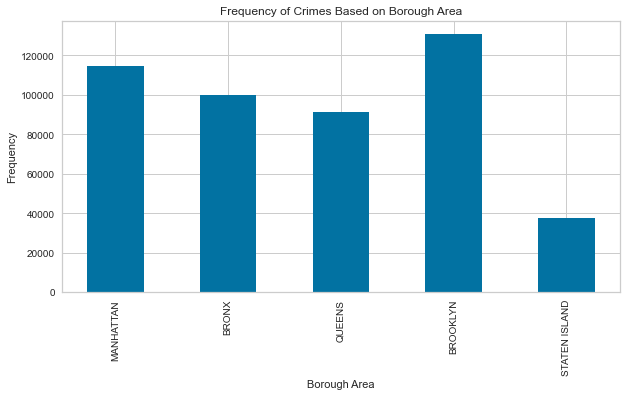

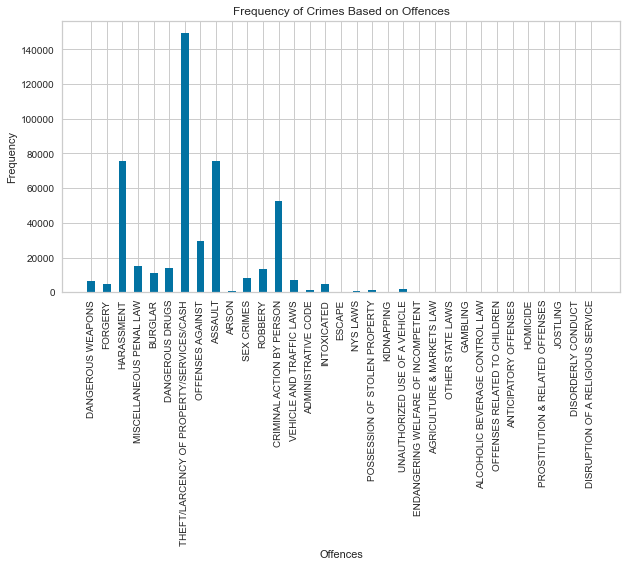

In [29]:
generateVerticalBarChart(crime_df,'BORO_NM','Borough Area')
generateVerticalBarChart(crime_df,'OFNS_DESC','Offences')

### Horizontal Bar Charts

In [30]:
def generateHorizontalBarChart(locationName):
    crime_df_temp = crime_df.loc[crime_df['BORO_NM'] == locationName]
    crimeTypesFreq = dict(Counter(crime_df_temp['LAW_CAT_CD']))

    crimeTypes = list(dict(Counter(crime_df_temp['LAW_CAT_CD'])).keys())
    crimeFreq = list(dict(Counter(crime_df_temp['LAW_CAT_CD'])).values())

    plt.figure(figsize = (10, 5))
    plt.barh(crimeTypes, crimeFreq)

    plt.ylabel("Crime Type")
    plt.xlabel("Number of Crimes")
    plt.title("Number of Crimes in "+ locationName + " Location")
    plt.show()

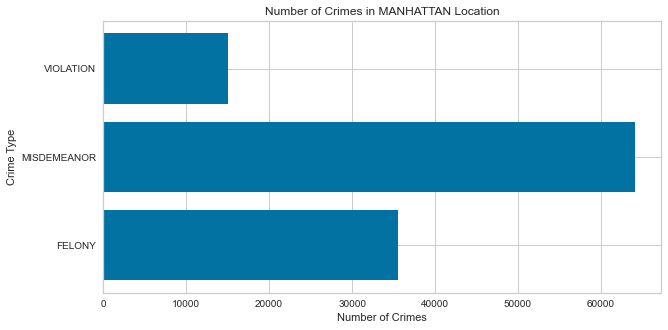

In [31]:
generateHorizontalBarChart('MANHATTAN')

### Pie Charts

In [32]:
def pieChart(df, columnName,titleName):
    dictionary = dict(Counter(df[columnName]))

    sumValues = sum(dictionary.values())
    
    labels = [key+' - '+str(round(value/sumValues*100,2))+'%' for key,value in dictionary.items()]   #labels
    values = [x for x in dictionary.values()] #values

    patches, texts = plt.pie(values, startangle=90)
    plt.legend(patches, labels, loc="upper left")
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.title("\nPie Chart for "+titleName)
    plt.show()

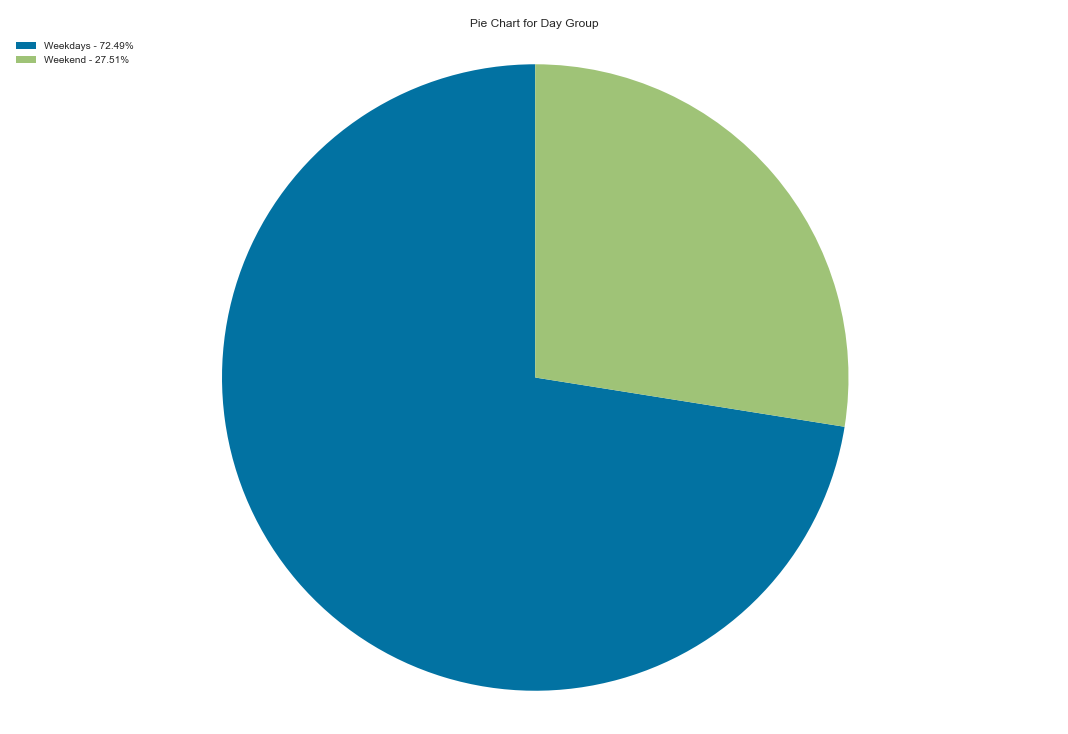

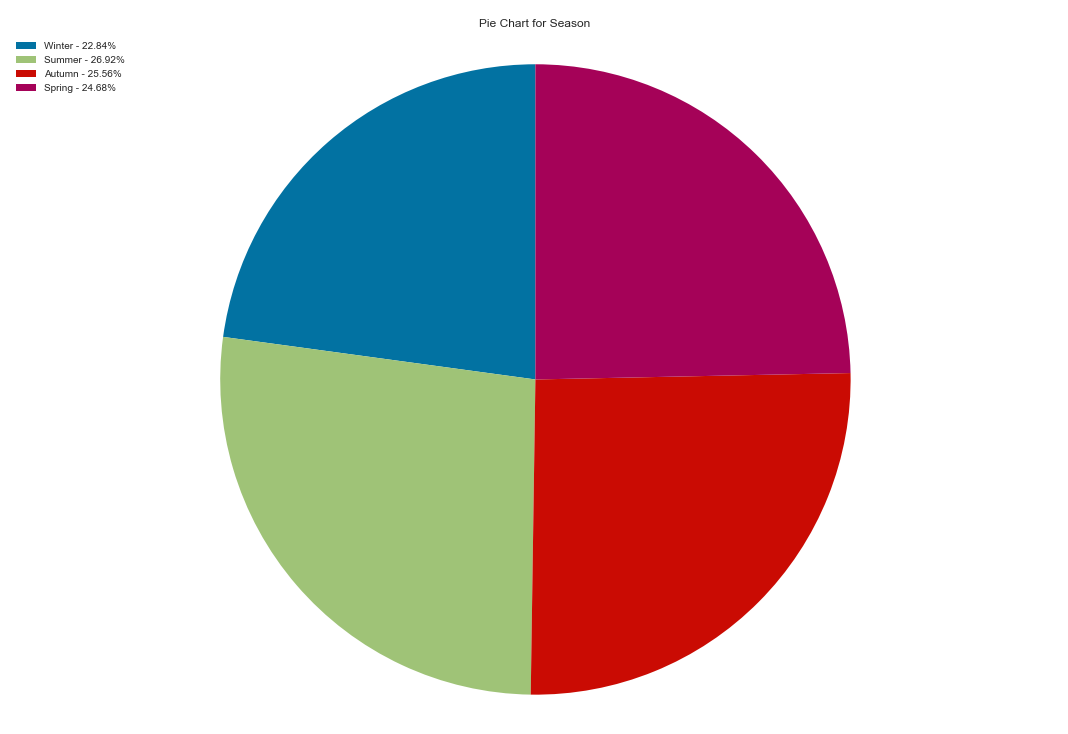

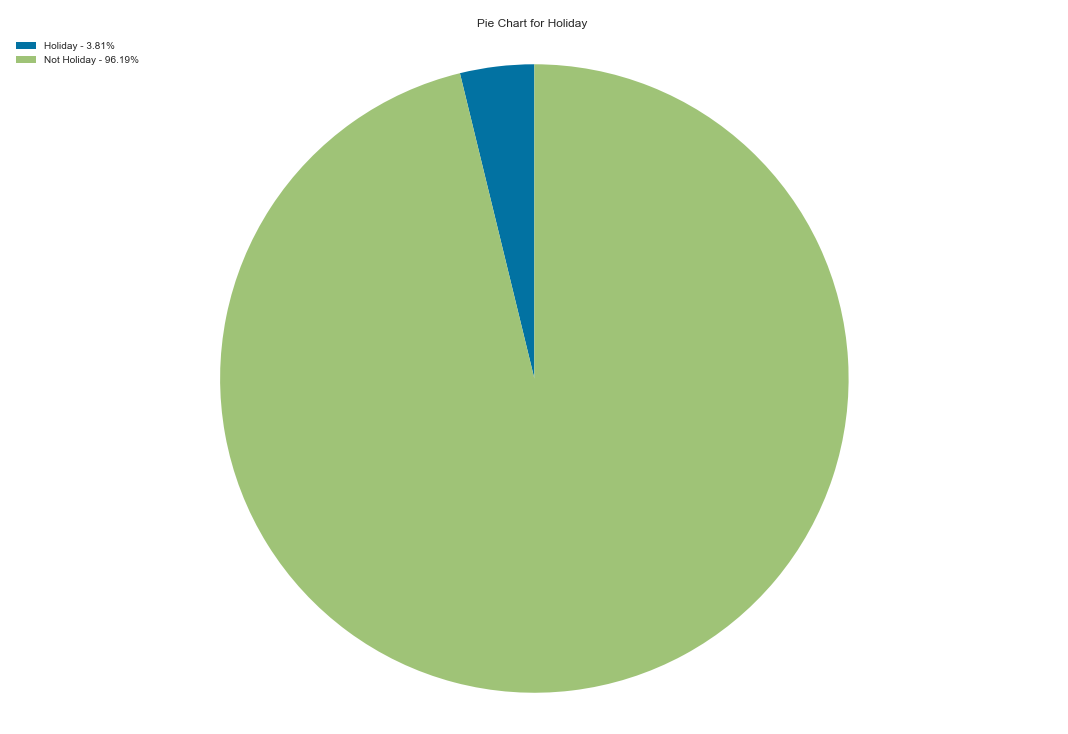

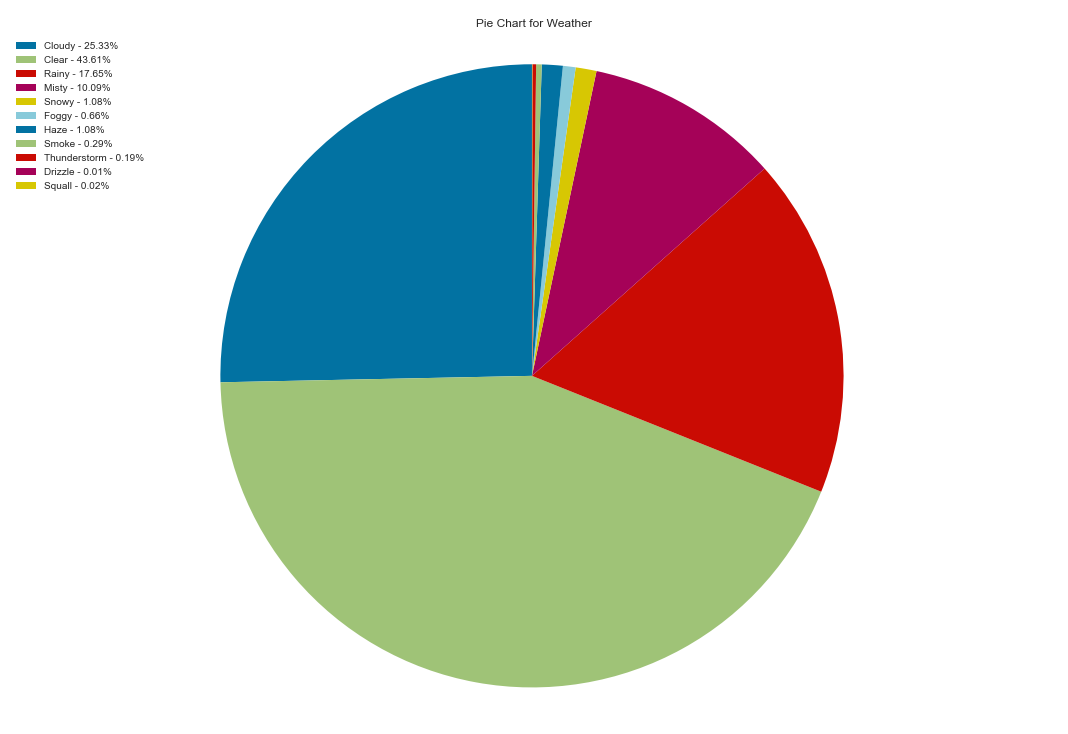

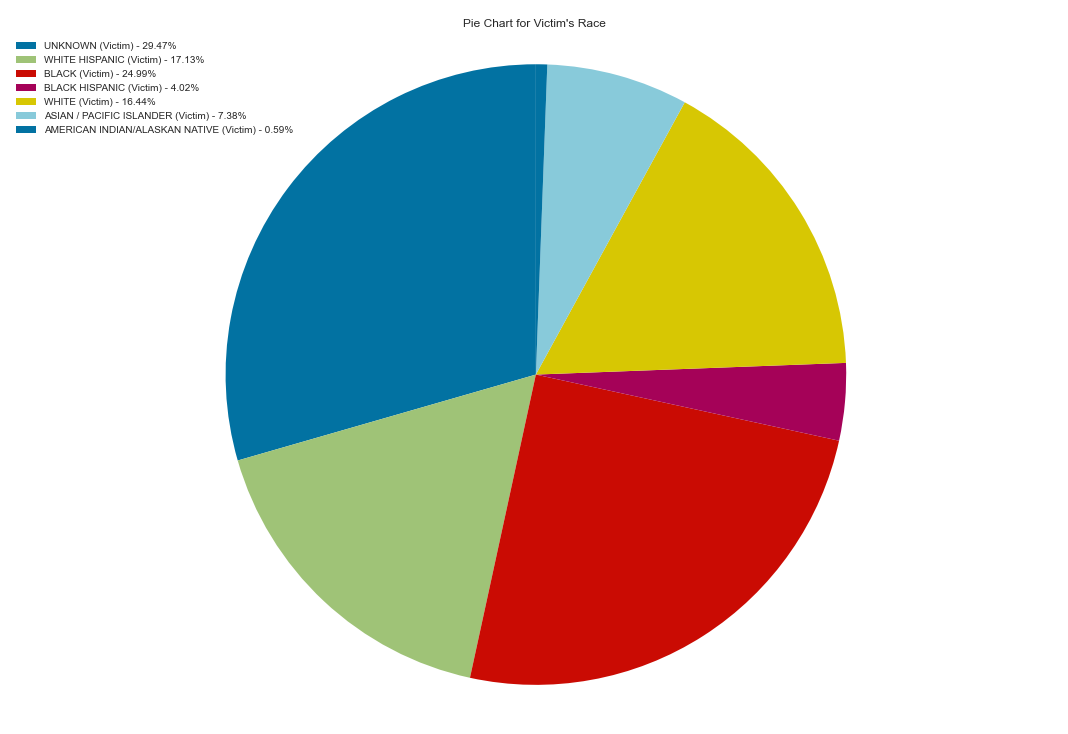

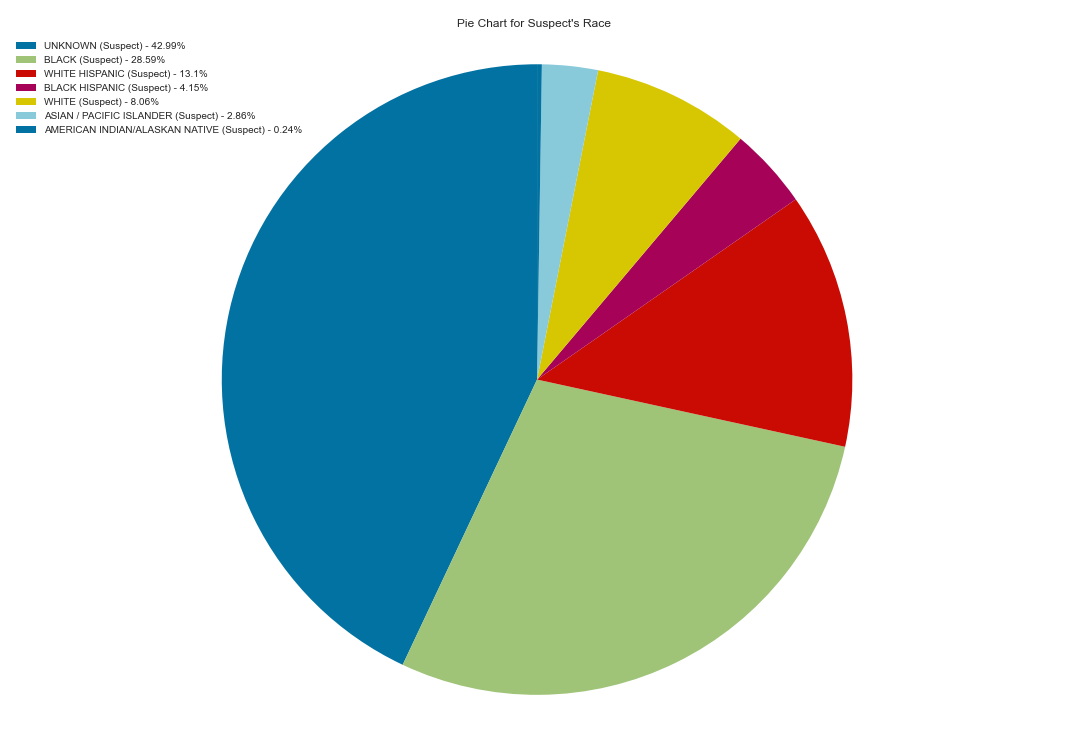

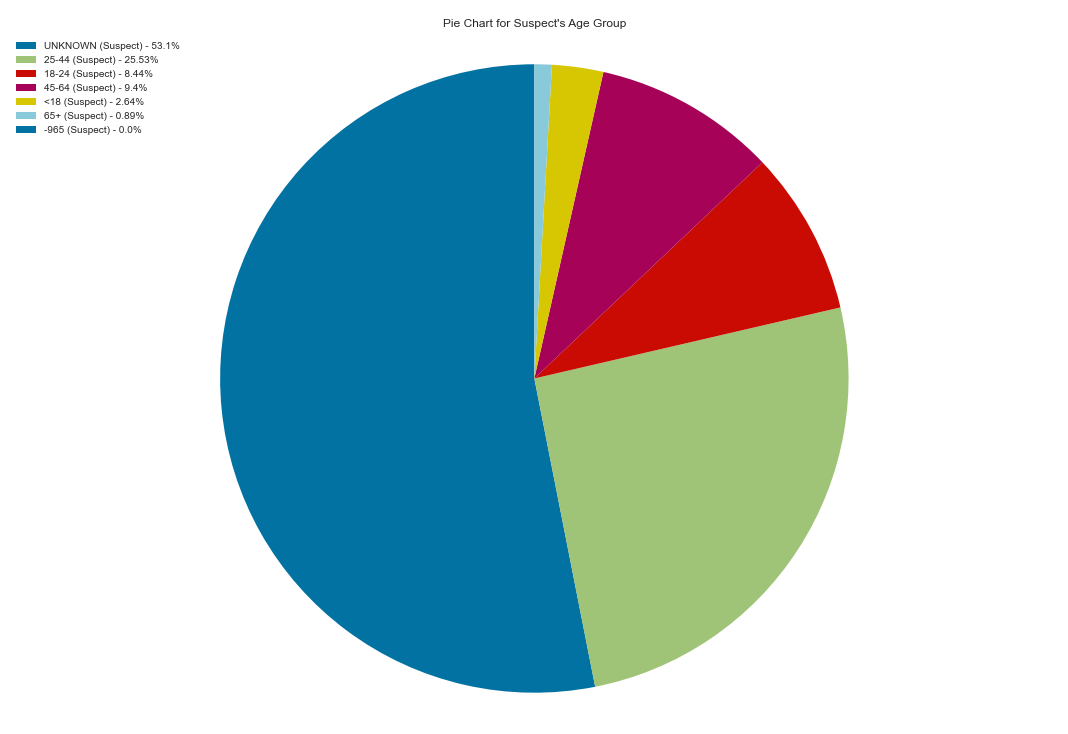

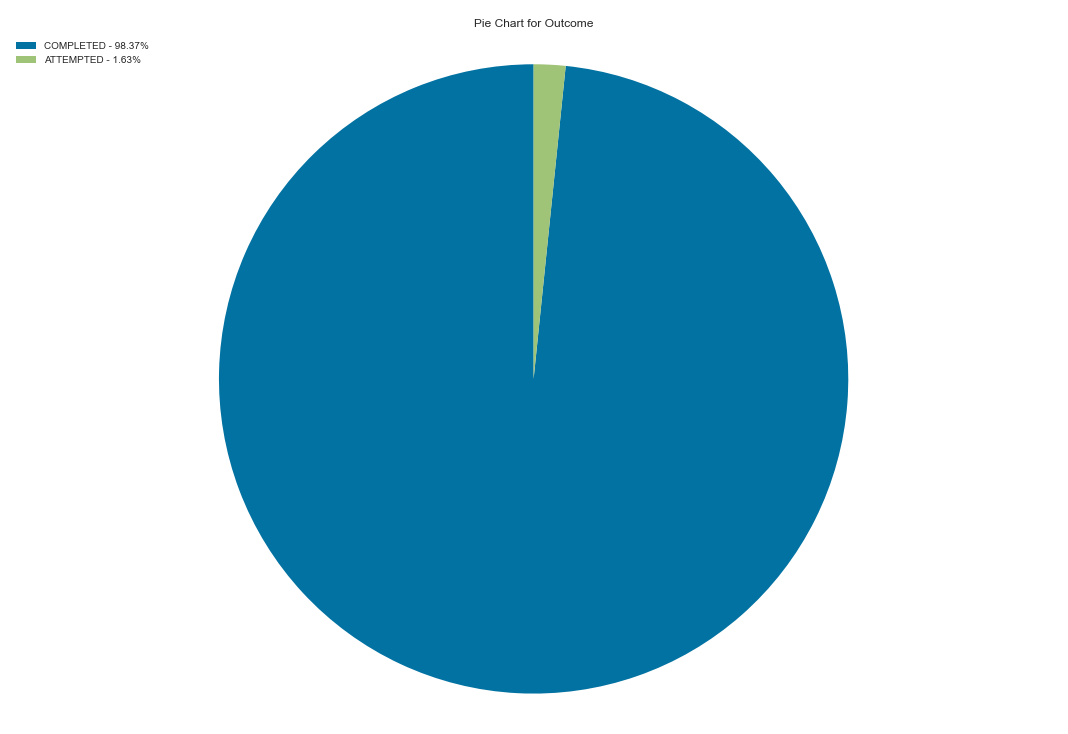

In [33]:
pieChart(crime_df, "Day Group", "Day Group")
pieChart(crime_df, "SEASON", "Season")
pieChart(crime_df, "ISHOLIDAY", "Holiday ")
pieChart(crime_df, "Weather Description", "Weather")
pieChart(crime_df, "VIC_RACE", "Victim's Race")
pieChart(crime_df, "SUSP_RACE", "Suspect's Race")
pieChart(crime_df, "SUSP_AGE_GROUP", "Suspect's Age Group")
pieChart(crime_df, "CRM_ATPT_CPTD_CD", "Outcome")

### Line Graphs

In [4]:
def generateLineGraphMonthly(df,columnName):
    crimeMonthFreq = dict(Counter(df[columnName]))
    crimeMonthFreqSorted = crimeMonthFreq.items()

    crimeMonthFreqSorted = dict(sorted(crimeMonthFreqSorted))


    data = {'Month': list(crimeMonthFreqSorted.keys()),
        'Crime_Frequency': list(crimeMonthFreqSorted.values())}

    temp_df = pd.DataFrame(data,columns=['Month','Crime_Frequency'])

    plt.figure(figsize = (10, 5))
    plt.plot(temp_df['Month'], temp_df['Crime_Frequency'], color='red', marker='o')
    plt.title('Trends in Crime Frequency Monthly', fontsize=14)
    plt.xlabel('Month', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Crime Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

In [5]:
def generateLineGraphMonthlyLocations(df,columnValue,monthYearColumn):
    
    locationNames = df[columnValue].unique()

    month_keys_list = []
    month_values_list = []
    
    for name in locationNames:
        crime_df_temp = df.loc[df[columnValue] == name]
    
        crimeMonthFreq = dict(Counter(crime_df_temp[monthYearColumn]))
        crimeMonthFreqSorted = crimeMonthFreq.items()

        crimeMonthFreqSorted = dict(sorted(crimeMonthFreqSorted))

        month_keys_list.append(list(crimeMonthFreqSorted.keys()))
        month_values_list.append(list(crimeMonthFreqSorted.values()))
    
    plt.rcParams['figure.figsize'] = [15, 10]
    
    fig, ax = plt.subplots()
        
    for index in range(len(month_values_list)):
        ax.plot(month_keys_list[0], month_values_list[index], marker='o',label=locationNames[index])
        
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  
    plt.title('Trends in Crime Frequency Monthly for Specific Boroughs', fontsize=14)
    plt.xlabel('Month', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Crime Frequency', fontsize=14)
    plt.grid(True)    

    plt.show()

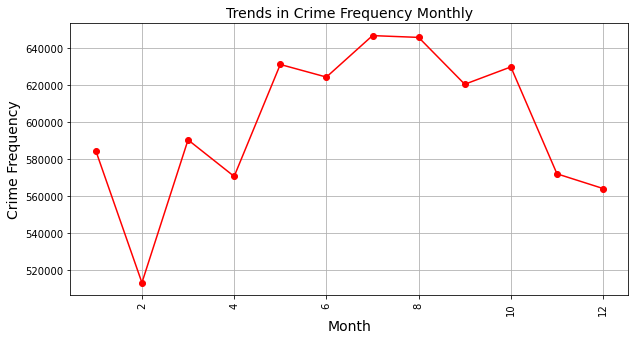

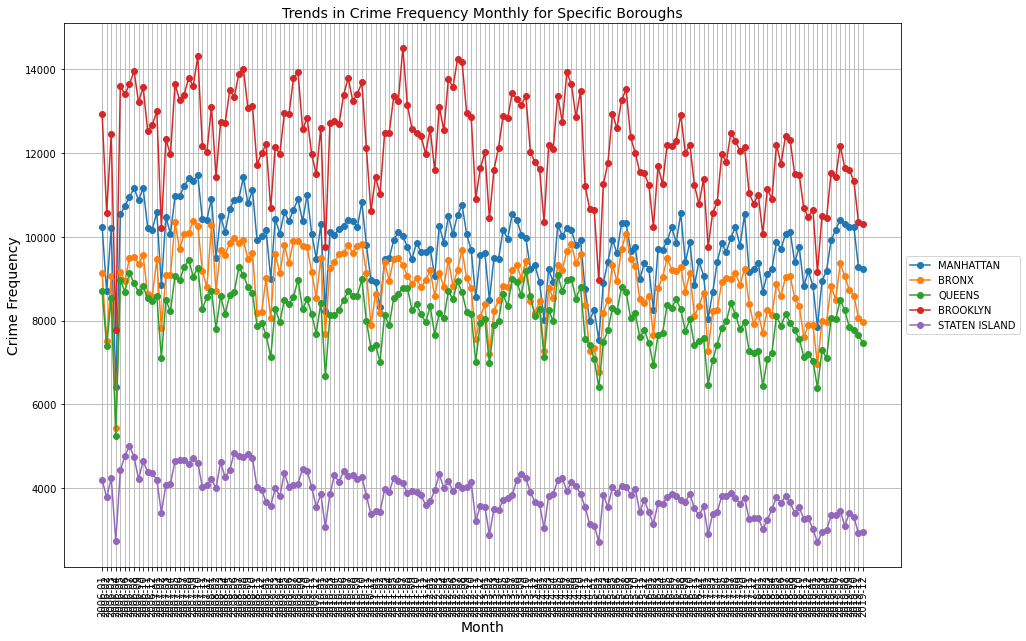

In [6]:
generateLineGraphMonthly(crime_df,'Month Number')
generateLineGraphMonthlyLocations(crime_df,'BORO_NM','Year_Month')